In [18]:
import numpy as np
# from tensorflow.keras import optimizers,Sequential, layers, Model
import matplotlib.pyplot as plt
# import tensorflow as tf


from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

import json
from matplotlib import colors

In [2]:
# 放入DENISE密度要*1000

marmousi_rho = np.load('E:\dataaaaaaaaaa\marmousi.rho.npy')
marmousi_vp = np.load('E:\dataaaaaaaaaa\marmousi.vp.npy')
marmousi_vs = np.load('E:\dataaaaaaaaaa\marmousi.vs.npy')
marmousi_vp = marmousi_vp.T
marmousi_rho = marmousi_rho.T
marmousi_vs = marmousi_vs.T

In [5]:
for index in range(0,10240,1000):
    m_vp = np.array(marmousi_vp[500:500+1024,0+index:1024+index])
    m_rho = np.array(marmousi_rho[500:500+1024,0+index:1024+index])*1000
    m_vs = np.array(marmousi_vs[500:500+1024,0+index:1024+index])
    x = np.random.randint(200, 800)
    y = np.random.randint(200, 800)
    r = np.random.randint(50, min(x,1024-x,y,1024-y,200))
    for i in range(x-r,x+r):
        for j in range(y-r,y+r):
            if (i-x)**2+(j-y)**2<r**2:
                m_vp[i,j] = 3000.
                m_vs[i,j] = 3000. / np.sqrt(3)
                m_rho[i,j] = 0.31 * 3000. ** (1 / 4) * 1000
    
    np.save(r'E:\tools\写论文\图表数据\异常体位置预测\marmousi模型中\model\model_'+str(index),m_vp)

In [12]:
m_1 = np.load(r'E:\tools\写论文\图表数据\异常体位置预测\marmousi模型中\model\model_'+str(0)+'.npy')
m_2 = np.load(r'E:\tools\写论文\图表数据\异常体位置预测\marmousi模型中\model\model_'+str(1000)+'.npy')
m_3 = np.load(r'E:\tools\写论文\图表数据\异常体位置预测\marmousi模型中\model\model_'+str(7000)+'.npy')
m_4 = np.load(r'E:\tools\写论文\图表数据\异常体位置预测\marmousi模型中\model\model_'+str(10000)+'.npy')

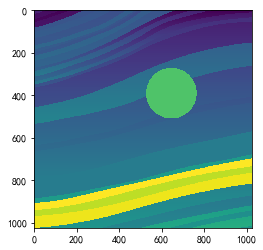

In [13]:
plt.imshow(m_4)

In [16]:
vpdatas = [m_1,m_2,m_3,m_4]

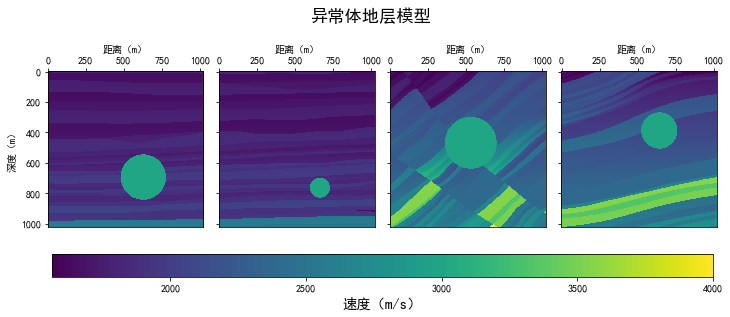

In [19]:
Nr = 1
Nc = 4

fig, axs = plt.subplots(Nr, Nc,figsize=(12, 8))
fig.suptitle('异常体地层模型',y=0.75,fontsize='xx-large')

images = []
# for i in range(Nr):
for j in range(Nc):
    # Generate data with a range that varies from one plot to the next.
#     if j==0 or j==2:
#             axs[j].set_title('实际地层'+str(j//2 +1))
#     if j==1 or j==3:
#         axs[j].set_title('预测地层'+str(j//2 +1))
#     axs[j].set_title('预测地层'+str(j//2 +1))
    axs[j].xaxis.set_ticks_position('top')
    axs[j].set_xlabel('距离（m）')
    axs[j].set_ylabel('深度（m）')
#     axs[j].set_xticks([0,100,200])
#     axs[j].set_xticklabels([0,400,800])
#     axs[j].set_yticks([0,50,100,150,200,250])
#     axs[j].set_yticklabels([0,200,400,600,800,1000])
    axs[j].xaxis.set_label_position('top')
    images.append(axs[j].imshow(vpdatas[j]))
    axs[j].label_outer()

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)
    
position=fig.add_axes([0.13, 0.28, 0.765, 0.04])#位置[左,y,右,高]
cbar  = fig.colorbar(images[0], ax=axs, cax=position, orientation='horizontal', fraction=.2)
cbar.set_label('速度（m/s）',fontsize='x-large')

# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!
def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() != im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacksSM.connect('changed', update)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig(r'E:\tools\写论文\图表数据\异常体位置预测\marmousi模型中\异常体地层模型.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)
plt.show()

In [20]:
data_json_f = open(r'E:\tools\写论文\图表数据\异常体位置预测\marmousi模型中\loss\run-loss_all_dropout_marmousi_end2-tag-dev_loss.json','r')
data_json = json.load(data_json_f)
data_json_f.close()
loss_dev_1 = np.array(data_json)
loss_dev_index_1 = loss_dev_1[:,1]
loss_dev_loss_1 = loss_dev_1[:,2]

data_json_f = open(r'E:\tools\写论文\图表数据\异常体位置预测\marmousi模型中\loss\run-loss_all_dropout_marmousi_end2-tag-train_loss.json','r')
data_json = json.load(data_json_f)
data_json_f.close()
loss_train_1 = np.array(data_json)
loss_train_index_1 = loss_train_1[:,1]
loss_train_loss_1 = loss_train_1[:,2]

data_json_f = open(r'E:\tools\写论文\图表数据\异常体位置预测\marmousi模型中\loss\run-loss_all_dropout_marmousi_end2+-tag-dev_loss.json','r')
data_json = json.load(data_json_f)
data_json_f.close()
loss_dev_2 = np.array(data_json)
loss_dev_index_2 = loss_dev_2[:,1]
loss_dev_loss_2 = loss_dev_2[:,2]

data_json_f = open(r'E:\tools\写论文\图表数据\异常体位置预测\marmousi模型中\loss\run-loss_all_dropout_marmousi_end2+-tag-train_loss.json','r')
data_json = json.load(data_json_f)
data_json_f.close()
loss_train_2 = np.array(data_json)
loss_train_index_2 = loss_train_2[:,1]
loss_train_loss_2 = loss_train_2[:,2]

data_json_f = open(r'E:\tools\写论文\图表数据\异常体位置预测\marmousi模型中\loss\run-loss_all_dropout_marmousi_end3+-tag-dev_loss.json','r')
data_json = json.load(data_json_f)
data_json_f.close()
loss_dev_3 = np.array(data_json)
loss_dev_index_3 = loss_dev_3[:,1]
loss_dev_loss_3 = loss_dev_3[:,2]

data_json_f = open(r'E:\tools\写论文\图表数据\异常体位置预测\marmousi模型中\loss\run-loss_all_dropout_marmousi_end3+-tag-train_loss.json','r')
data_json = json.load(data_json_f)
data_json_f.close()
loss_train_3 = np.array(data_json)
loss_train_index_3 = loss_train_3[:,1]
loss_train_loss_3 = loss_train_3[:,2]

In [21]:
loss_dev_index_1

array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
        450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
        900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
       1350., 1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750.,
       1800., 1850., 1900., 1950., 2000., 2050., 2100., 2150., 2200.,
       2250., 2300., 2350., 2400., 2450., 2500., 2550., 2600., 2650.,
       2700., 2750., 2800., 2850., 2900., 2950., 3000., 3050., 3100.,
       3150., 3200., 3250., 3300., 3350., 3400., 3450., 3500., 3550.,
       3600., 3650., 3700., 3750., 3800., 3850., 3900., 3950., 4000.,
       4050., 4100., 4150., 4200., 4250., 4300., 4350., 4400., 4450.,
       4500., 4550., 4600.])

In [26]:
# np.concatenate([loss_dev_index_1,loss_dev_index_2 +4600])

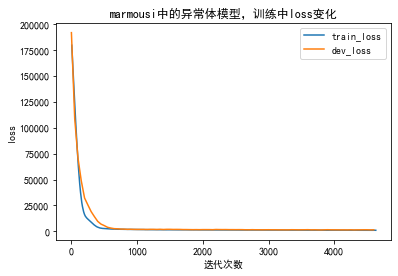

In [27]:
start = 0
start2 = 0
plt.title("marmousi中的异常体模型，训练中loss变化")
plt.ylabel("loss")
plt.xlabel("迭代次数")
plt.plot(loss_train_index_1[start:],loss_train_loss_1[start:],label='train_loss')
plt.plot(loss_dev_index_1[start2:],loss_dev_loss_1[start2:],label='dev_loss')
plt.legend()
plt.savefig(r'E:\tools\写论文\图表数据\异常体位置预测\marmousi模型中\marmousi中的异常体模型训练中loss变化.jpg',bbox_inches='tight',dpi=300,pad_inches=0.5)

In [28]:
test_y = np.load(r'E:\tools\写论文\图表数据\异常体位置预测\marmousi模型中\datas\test_y.npy')
y_test_pred = np.load(r'E:\tools\写论文\图表数据\异常体位置预测\marmousi模型中\datas\y_test_pred.npy')

In [31]:
index = 235
num = 0
m_t_1 = np.array(marmousi_vp[500:500+1024,0+index:1024+index])
x = int(test_y[num,0])
y = int(test_y[num,1])
r = int(test_y[num,2])
for i in range(x-r,x+r):
    for j in range(y-r,y+r):
        if (i-x)**2+(j-y)**2<r**2:
            m_t_1[i,j] = 3000.
            
index = 235
num = 0
m_p_1 = np.array(marmousi_vp[500:500+1024,0+index:1024+index])
x = int(y_test_pred[num,0])
y = int(y_test_pred[num,1])
r = int(y_test_pred[num,2])
for i in range(x-r,x+r):
    for j in range(y-r,y+r):
        if (i-x)**2+(j-y)**2<r**2:
            m_p_1[i,j] = 3000.
            
index = 1234
num = 16
m_t_2 = np.array(marmousi_vp[500:500+1024,0+index:1024+index])
x = int(test_y[num,0])
y = int(test_y[num,1])
r = int(test_y[num,2])
for i in range(x-r,x+r):
    for j in range(y-r,y+r):
        if (i-x)**2+(j-y)**2<r**2:
            m_t_2[i,j] = 3000.
            
index = 1234
num = 16
m_p_2 = np.array(marmousi_vp[500:500+1024,0+index:1024+index])
x = int(y_test_pred[num,0])
y = int(y_test_pred[num,1])
r = int(y_test_pred[num,2])
for i in range(x-r,x+r):
    for j in range(y-r,y+r):
        if (i-x)**2+(j-y)**2<r**2:
            m_p_2[i,j] = 3000.

index = 3456
num = 32
m_t_3 = np.array(marmousi_vp[500:500+1024,0+index:1024+index])
x = int(test_y[num,0])
y = int(test_y[num,1])
r = int(test_y[num,2])
for i in range(x-r,x+r):
    for j in range(y-r,y+r):
        if (i-x)**2+(j-y)**2<r**2:
            m_t_3[i,j] = 3000.
            
index = 3456
num = 32
m_p_3 = np.array(marmousi_vp[500:500+1024,0+index:1024+index])
x = int(y_test_pred[num,0])
y = int(y_test_pred[num,1])
r = int(y_test_pred[num,2])
for i in range(x-r,x+r):
    for j in range(y-r,y+r):
        if (i-x)**2+(j-y)**2<r**2:
            m_p_3[i,j] = 3000.

index = 6666
num = 64
m_t_4 = np.array(marmousi_vp[500:500+1024,0+index:1024+index])
x = int(test_y[num,0])
y = int(test_y[num,1])
r = int(test_y[num,2])
for i in range(x-r,x+r):
    for j in range(y-r,y+r):
        if (i-x)**2+(j-y)**2<r**2:
            m_t_4[i,j] = 3000.
            
index = 6666
num = 64
m_p_4 = np.array(marmousi_vp[500:500+1024,0+index:1024+index])
x = int(y_test_pred[num,0])
y = int(y_test_pred[num,1])
r = int(y_test_pred[num,2])
for i in range(x-r,x+r):
    for j in range(y-r,y+r):
        if (i-x)**2+(j-y)**2<r**2:
            m_p_4[i,j] = 3000.

In [32]:
layers = np.array([
    [m_t_1,m_t_2,m_t_3,m_t_4],
    [m_p_1,m_p_2,m_p_3,m_p_4]
])

In [34]:
num = 64
print(test_y[64],y_test_pred[64])

[729. 622.  84.] [774.1555   633.67084   80.890656]


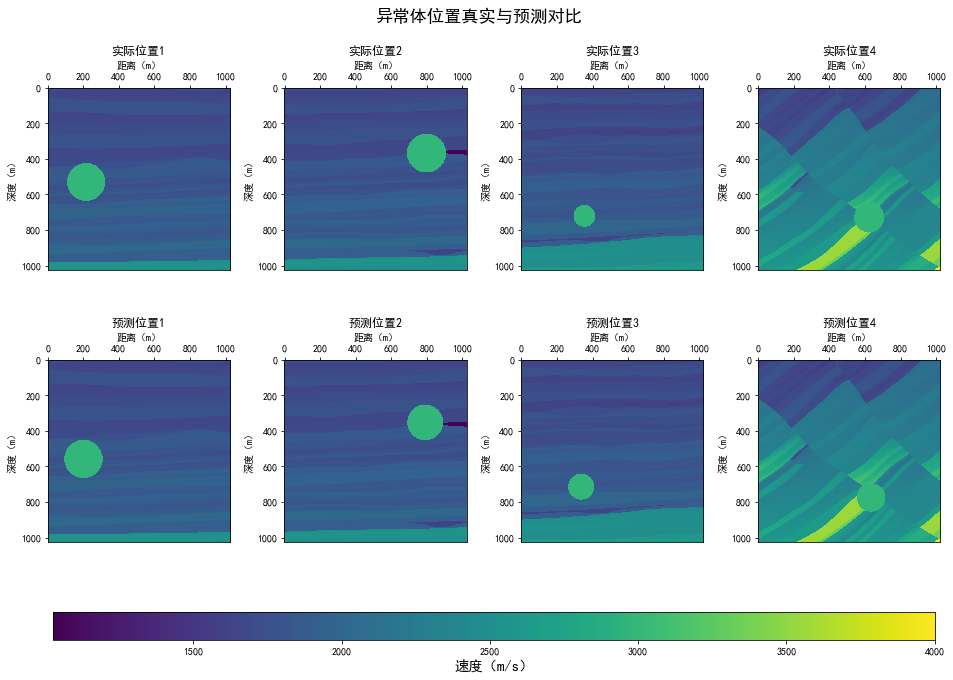

In [33]:
Nr = 2
Nc = 4

fig, axs = plt.subplots(Nr, Nc,figsize=(16, 10))
fig.suptitle('异常体位置真实与预测对比',y=0.93,fontsize='xx-large')

images = []
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
        if i==0:
            axs[i,j].set_title('实际位置'+str(j+1))
        if i==1:
            axs[i,j].set_title('预测位置'+str(j+1))
        axs[i,j].xaxis.set_ticks_position('top')
        axs[i,j].set_xlabel('距离（m）')
        axs[i,j].set_ylabel('深度（m）')
#         axs[i,j].set_xticks([0,100,200])
#         axs[i,j].set_xticklabels([0,400,800])
#         axs[i,j].set_yticks([0,50,100,150,200,250])
#         axs[i,j].set_yticklabels([0,200,400,600,800,1000])
        axs[i,j].xaxis.set_label_position('top')
        images.append(axs[i,j].imshow(layers[i,j]))
#         axs[i,j].label_outer()

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)
    
position=fig.add_axes([0.13, 0.05, 0.765, 0.04])#位置[x,y,宽,高]
cbar  = fig.colorbar(images[0], ax=axs, cax=position, orientation='horizontal', fraction=.2)
cbar.set_label('速度（m/s）',fontsize='x-large')

# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!
def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() != im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacksSM.connect('changed', update)
plt.subplots_adjust(wspace=0.3, hspace=0.001)
plt.savefig(r'E:\tools\写论文\图表数据\异常体位置预测\marmousi模型中\异常体位置真实与预测对比.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)
plt.show()